In [140]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [141]:
df = pd.read_csv("datasets/hamamatsu_temp.csv")

In [142]:
df["date"] = pd.to_datetime(df["date"])

In [143]:
df

,date,temp
0,2000-01-01,9.0
1,2000-01-02,9.1
2,2000-01-03,10.2
3,2000-01-04,9.7
4,2000-01-05,9.1
...,...,...
8330,2022-10-22,19.9
8331,2022-10-23,20.1
8332,2022-10-24,17.7
8333,2022-10-25,13.3


In [144]:
df = df.set_index("date")

In [145]:
df

,temp
date,
2000-01-01,9.0
2000-01-02,9.1
2000-01-03,10.2
2000-01-04,9.7
2000-01-05,9.1
...,...
2022-10-22,19.9
2022-10-23,20.1
2022-10-24,17.7


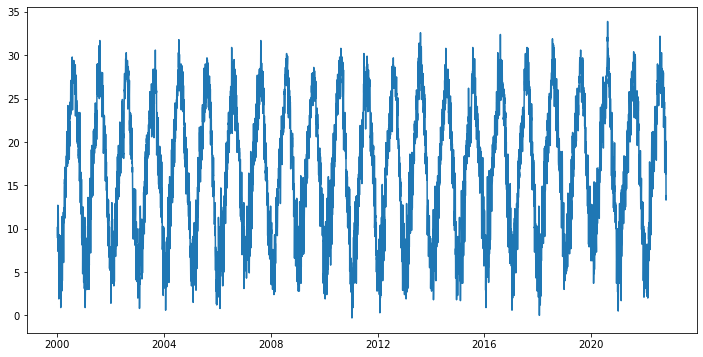

In [146]:
plt.plot(df)

(array([ 128.,  818., 1108.,  961.,  950., 1157., 1187., 1117.,  872.,
          37.]),
 array([-0.3 ,  3.12,  6.54,  9.96, 13.38, 16.8 , 20.22, 23.64, 27.06,
        30.48, 33.9 ]),
 <BarContainer object of 10 artists>)

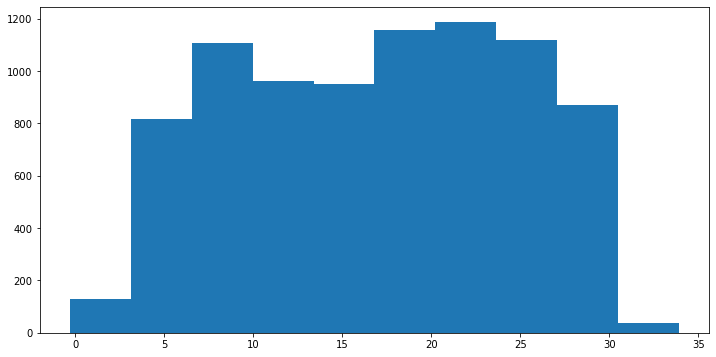

In [147]:
plt.hist(df)

In [167]:
df_month = df["2000":"2022"].resample("M").mean()

In [168]:
df_month

,temp
date,
2000-01-31,7.770968
2000-02-29,4.920690
2000-03-31,8.764516
2000-04-30,14.643333
2000-05-31,19.629032
...,...
2022-06-30,23.116667
2022-07-31,26.761290
2022-08-31,28.170968


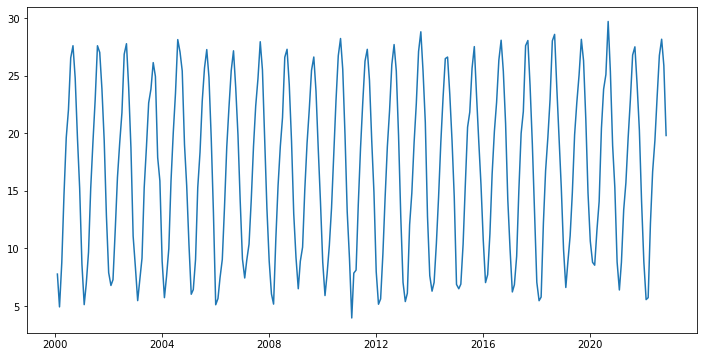

In [169]:
plt.plot(df_month)

In [184]:
train = df_month["2000":"2020"]

In [185]:
test = df_month["2020":]

In [186]:
from statsmodels.tsa.ar_model import AutoReg

In [210]:
model_ar = AutoReg(train, 12, old_names=False)

In [211]:
result_ar = model_ar.fit()

In [212]:
print(result_ar.summary())

                            AutoReg Model Results                             
Dep. Variable:                   temp   No. Observations:                  252
Model:                    AutoReg(12)   Log Likelihood                -363.354
Method:               Conditional MLE   S.D. of innovations              1.100
Date:                Fri, 28 Oct 2022   AIC                            754.708
Time:                        00:28:23   BIC                            803.437
Sample:                    01-31-2001   HQIC                           774.343
                         - 12-31-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6362      2.752      2.412      0.016       1.243      12.029
temp.L1        0.4066      0.062      6.606      0.000       0.286       0.527
temp.L2       -0.0949      0.065     -1.453      0.1

In [213]:
# 学習(train)データの最後の行からdfの最後の行 → テストデータ
prediction_ar = result_ar.predict(start=len(train), end=len(df_month))

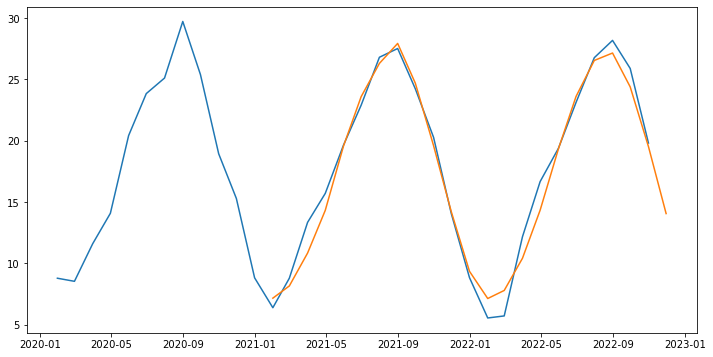

In [214]:
plt.plot(test, label="data_set")
plt.plot(prediction_ar, label="ar")
plt.show()

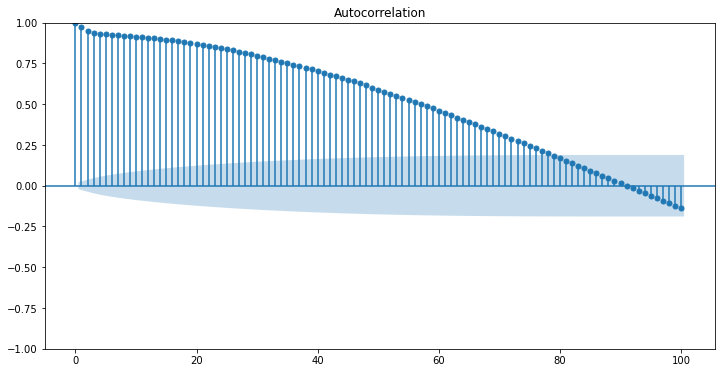

In [159]:
corr = sm.graphics.tsa.plot_acf(df["temp"], lags=100)